Завдання 1

In [28]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataset = pd.read_csv(url)


In [29]:
from sklearn.model_selection import train_test_split

# Розділимо ознаки та цільову змінну
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred)
print("Точність логістичної регресії:", accuracy)


Точність логістичної регресії: 0.7705627705627706


Correlation matrix:
              6       148        72        35         0      33.6     0.627  \
6      1.000000  0.143529  0.180118 -0.111758 -0.089465  0.007409 -0.004979   
148    0.143529  1.000000  0.243080  0.042665  0.323693  0.199181  0.135252   
72     0.180118  0.243080  1.000000  0.159545  0.057593  0.370754  0.026730   
35    -0.111758  0.042665  0.159545  1.000000  0.451067  0.421924  0.188595   
0     -0.089465  0.323693  0.057593  0.451067  1.000000  0.200849  0.168056   
33.6   0.007409  0.199181  0.370754  0.421924  0.200849  1.000000  0.131008   
0.627 -0.004979  0.135252  0.026730  0.188595  0.168056  0.131008  1.000000   
50     0.534340  0.270254  0.253091 -0.176263 -0.059854  0.008412  0.046635   

             50  
6      0.534340  
148    0.270254  
72     0.253091  
35    -0.176263  
0     -0.059854  
33.6   0.008412  
0.627  0.046635  
50     1.000000  
Accuracy of Logistic Regression with selected features: 0.683982683982684


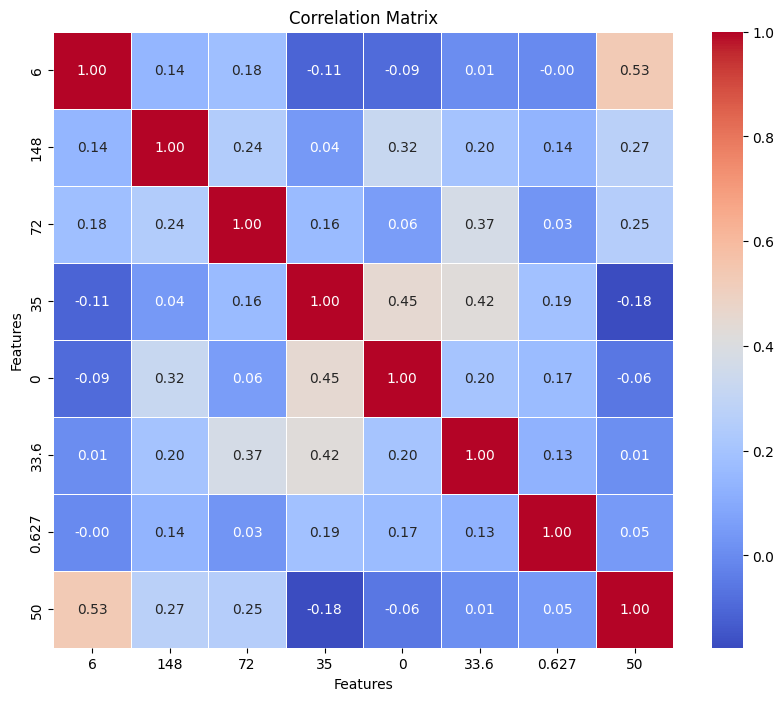

In [32]:
# Building the correlation matrix
correlation_matrix = X_train.corr()

# Displaying the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Selected features for model training
selected_features = [4, 5, 6, 7]
X_train_selected = X_train.iloc[:, selected_features]
X_val_selected = X_val.iloc[:, selected_features]

# Normalizing the selected features
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)

# Training the logistic regression model on selected features
model_selected = LogisticRegression()
model_selected.fit(X_train_selected_scaled, y_train)

# Predicting on the validation set
y_pred_selected = model_selected.predict(X_val_selected_scaled)

# Evaluating the accuracy of the model
accuracy_selected = accuracy_score(y_val, y_pred_selected)
print("Accuracy of Logistic Regression with selected features:", accuracy_selected)

import seaborn as sns
import matplotlib.pyplot as plt

# Building the correlation matrix
correlation_matrix = X_train.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()



Завдання 2

In [33]:
import pandas as pd

# Завантаження даних з CSV-файлів
run_accelerometer = pd.read_csv("run_accelerometer.csv")
run_gyroscope = pd.read_csv("run_gyroscope.csv")
jack_accelerometer = pd.read_csv("jack_accelerometer.csv")
jack_gyroscope = pd.read_csv("jack_gyroscope.csv")
pres_accelerometer = pd.read_csv("pres_accelerometer.csv")
pres_gyroscope = pd.read_csv("pres_gyroscope.csv")

# Додавання стовпців "activity" та об'єднання даних в один датасет
run_accelerometer['activity'] = 'run'
run_gyroscope['activity'] = 'run'
jack_accelerometer['activity'] = 'jack'
jack_gyroscope['activity'] = 'jack'
pres_accelerometer['activity'] = 'pres'
pres_gyroscope['activity'] = 'pres'

# Об'єднання всіх даних в один датасет
dataset = pd.concat([run_accelerometer, run_gyroscope, jack_accelerometer, jack_gyroscope, pres_accelerometer, pres_gyroscope], ignore_index=True)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Поділ датасету на тренувальну і валідаційну вибірки (70/30%)
X = dataset.drop('activity', axis=1)
y = dataset['activity']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Нормалізація даних
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Тренування моделі SVM
svm_model = SVC(kernel='linear', decision_function_shape='ovo')
svm_model.fit(X_train_scaled, y_train)

# Прогнозування на валідаційній вибірці
y_pred = svm_model.predict(X_val_scaled)

# Оцінка результату
accuracy = accuracy_score(y_val, y_pred)
print("Точність SVM Classifier:", accuracy)


Точність SVM Classifier: 1.0


                     time  seconds_elapsed         z         y         x
time             1.000000         0.068925 -0.009032  0.008723  0.021481
seconds_elapsed  0.068925         1.000000 -0.013060  0.011633  0.011650
z               -0.009032        -0.013060  1.000000 -0.168018 -0.102408
y                0.008723         0.011633 -0.168018  1.000000  0.801964
x                0.021481         0.011650 -0.102408  0.801964  1.000000
Accuracy of SVM Classifier with selected features: 1.0


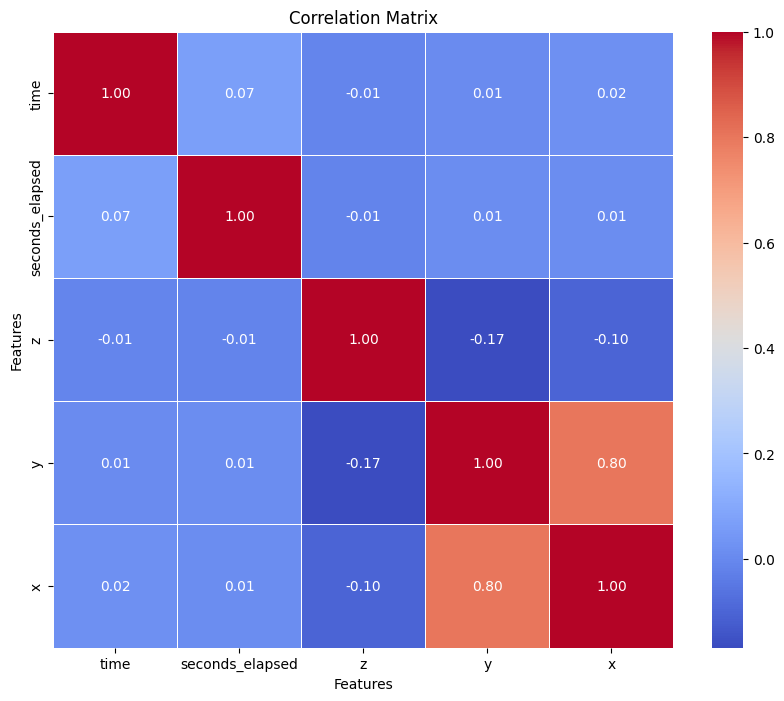

In [36]:
correlation_matrix = X_train.corr()
# Виведення кореляційної матриці
print(correlation_matrix)
# Вибір 5 ознак з найбільшою кореляцією між собою
selected_features = correlation_matrix.nlargest(5, correlation_matrix.columns).index
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Нормалізація вибраних ознак
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)

# Тренування моделі SVM на вибраних ознаках
svm_model_selected = SVC(kernel='linear', decision_function_shape='ovo')
svm_model_selected.fit(X_train_selected_scaled, y_train)

# Прогнозування на валідаційній вибірці з вибраними ознаками
y_pred_selected = svm_model_selected.predict(X_val_selected_scaled)

# Оцінка результату з вибраними ознаками
accuracy_selected = accuracy_score(y_val, y_pred_selected)
print("Accuracy of SVM Classifier with selected features:", accuracy_selected)

# Building the correlation matrix


# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
